# Won't you be my neighbor?
## Why block-level aggregations fail to capture urban demographic patterns

Anyone who has wandered through urban areas knows that streets define the character of a neighborhood. High foot-traffic avenues with shops and patio cafes feel distinct from the residential side streets intersecting them. How well does this perception hold up empirically? Extremely well.


## Census-derived demographic data are block-based.

Aggregated demographic data form the bedrock of social scientific research and policy. It is the kind of data that allows us to create maps like the ones below, exploring how socioeconomics vary across neighborhoods. 

The most influential source of aggregated data is the U.S. government. Census and survey data are collected at individual and household levels. They are disseminated as aggregations over neighborhoods, tracts, or counties, however. This protects your privacy, making sure no one can trace your location from your survey responses. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import folium
from map_tracts import plot_rented

%matplotlib inline

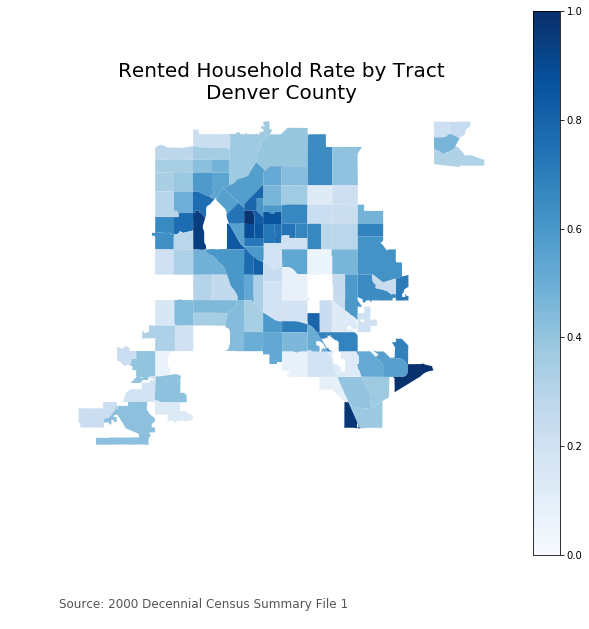

In [2]:
plot_rented('Denver')

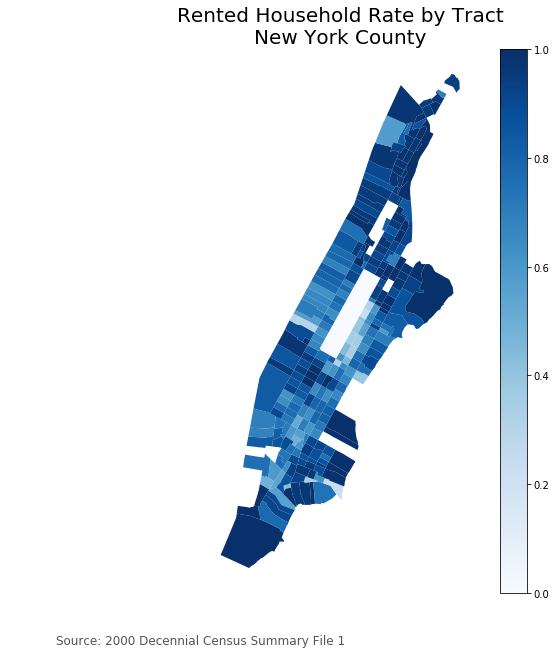

In [3]:
plot_rented('New York')

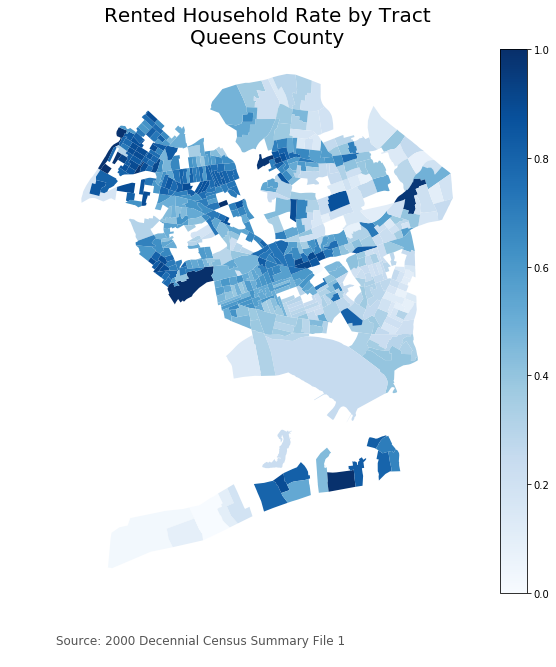

In [4]:
plot_rented('Queens')


## Which street you live on says a lot about you. Which block you live on doesn’t.

The smallest unit of data available to the public is a block. The Census defines blocks technically, but you can think of a rectangular city block as the simplest example. There is good reason for grouping neighbors together — we have a habit of living around people who are generally similar to ourselves. Grouping people by blocks has some perplexing implications, however. Streets are essentially split down the middle. As a result, you are grouped with someone on the other side of a block rather than the neighbor living directly across the street. 

Using household- and individual-level data (available in secure [Federal Statistical Research Centers](https://www.colorado.edu/rocky-mountain-research-data-center/)) for eight counties corresponding with New York City, Chicago, Houston, Los Angeles, and Denver, I looked at measures of age, race, family structure, family size, and home ownership.


In [5]:
m = folium.Map(
    location=[40, -95],
    zoom_start=4,
    tiles='cartodbpositron'
)

tooltip = 'Click me!'

folium.Marker([34.052235, -118.243683], popup='<b>Los Angeles County</b>', tooltip=tooltip).add_to(m)
folium.Marker([39.742043, -104.991531], popup='<b>Denver County</b>', tooltip=tooltip).add_to(m)
folium.Marker([41.881832, -87.623177], popup='<b>Cook County</b>', tooltip=tooltip).add_to(m)
folium.Marker([40.837048, -73.865433], popup='<b>Bronx County</b>', tooltip=tooltip).add_to(m)
folium.Marker([40.650002, -73.949997], popup='<b>Kings County</b>', tooltip=tooltip).add_to(m)
folium.Marker([40.742054, -73.769417], popup='<b>Queens County</b>', tooltip=tooltip).add_to(m)
folium.Marker([40.758896, -73.985130], popup='<b>New York County</b>', tooltip=tooltip).add_to(m)
folium.Marker([29.749907, -95.358421], popup='<b>Harris County</b>', tooltip=tooltip).add_to(m)

m

The crux of my project involved simulations. If blocks do a good job of capturing the demographics of all of the people living on them, then it doesn’t matter on which side of a block a house sits. This means I could randomly shuffle houses within each block, and my aggregate values will look roughly the same. By comparing the real aggregations to this simulation, I could see whether the differences between street aggregations and block aggregations were statistically significant (not a random fluke), as shown in the table below.

Almost every city revealed that people sort themselves by street, even within block. In the table below, every cell with values over .05 represents a statistically significant difference between grouping people by streets and by blocks.

In [6]:
p_vals = pd.read_csv("images-tables/p-vals.csv")
p_vals

,County,Denver County,Cook County (Chicago),Bronx County (Bronx),Kings County (Brooklyn),New York County (Manhattan),Queens County (Queens),Harris County (Houston)
0,Vacancy Rate,0.95,0,0,0,0,0,1.00
1,Homeownership Rate,0.00,0,0,0,0,0,0.00
2,Rentership Rate,0.00,0,0,0,0,0,0.00
3,Average Family Size,0.00,0,0,0,0,0,0.00
4,Average Number of Children per Household,0.00,0,0,0,0,0,0.00
5,Average Number of Elderly per Household,0.00,0,0,0,0,0,0.00
6,Married Couple Household Rate,0.00,0,0,0,0,0,0.00
7,Rate Families Headed by Men Alone,0.00,0,0,0,0,0,0.00
8,Rate Families Headed by Women Alone,0.00,0,0,0,0,0,0.00
9,Rate Males Living Alone,0.00,0,0,0,0,0,0.00


## Why does this matter?

Consider your own demographic characteristics and location. Were I to know the average rate of homeownership on your block, how well would I be able to guess whether or not you owned or rented? Let’s say I also knew which street you lived on. Would that improve my chances at all? Almost across the board, which street you live on matters. This means that grouping people by blocks obscures socioeconomic or racial differences. A neighborhood that seems perfectly integrated at the block level, for example, might be racially segregated by street.

We can think of gerrymandering as the classic example of how much boundaries matter. Simply by messing with the shape of aggregation units, we can get a vastly different picture of how people are organized in space. By failing to capture the real-life demographic patterns in urban areas, it is as if the Census is unintentionally "gerrymandering." Ultimately, my results suggest costly and life-affecting decisions are being made with sub-par data.

<img src="images-tables/block_1.png" width="400">

<img src="images-tables/block_2.png" width="400">

## Moving towards a better map — next steps

Street faces are very small. There aren’t nearly enough people living on one side of one street to protect the privacy of survey participants. This project suggests that streets might follow natural demographic patterns better than blocks do. For street-level demographics to truly be feasible, however, we would need to combine small segments of streets into larger units.

Luckily, intelligently combining neighboring data points with similar values is a huge component of machine learning, such as “continuity-constrained clustering.” A good example of this kind of data-reduction is collapsing neighboring pixels of an image that are similar in color, in order to find discrete objects.

Similar techniques might help build new neighborhood boundaries based on streets. This project, however, is a crucial first step. We now know how important street networks are in predicting demographic characteristics.


## The details

For more information on my research process, please see the code and README in this [repository](https://github.com/mgraber/street-based-demographics).
